EECS 731 - Movie Clustering

As always we want to get our data and take a look at it...

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [2]:
# read rating data
rating = pd.read_csv("../data/raw/ratings.csv")
rating = rating.loc[:,["userId","movieId","rating"]]
rating.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0


In [3]:
# read movie data
movie = pd.read_csv("../data/raw/movies.csv")
movie = movie.loc[:,["movieId","title"]]
movie.head(10)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


In [4]:
# merge the two dataframes
data = pd.merge(movie,rating)
data.head(10)

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
5,1,Toy Story (1995),18,3.5
6,1,Toy Story (1995),19,4.0
7,1,Toy Story (1995),21,3.5
8,1,Toy Story (1995),27,3.0
9,1,Toy Story (1995),31,5.0


In [5]:
data.shape

(100836, 4)

In [6]:
data = data.iloc[:1000,:]

In [7]:
# Refactor things into a pivot table
# I saw some users online use this approach to look at how users rated every movie on the list

pivot_table = data.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head(10)

title,"American President, The (1995)",Balto (1995),Casino (1995),Cutthroat Island (1995),Dracula: Dead and Loving It (1995),Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Nixon (1995),Sabrina (1995),Sense and Sensibility (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
6,4.0,3.0,4.0,4.0,NaN,5.0,3.0,5.0,4.0,4.0,NaN,4.0,4.0,NaN,3.0,NaN,3.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN
8,4.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN


In [8]:
#Look at the general correlations between movies

similarity_with_other_movies = pivot_table.corr(method='pearson', min_periods=1)
similarity_with_other_movies.head(10)

title,"American President, The (1995)",Balto (1995),Casino (1995),Cutthroat Island (1995),Dracula: Dead and Loving It (1995),Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Nixon (1995),Sabrina (1995),Sense and Sensibility (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
title,,,,,,,,,,,,,,,,,
"American President, The (1995)",1.000000,0.866025,0.251642,0.050515,NaN,0.341227,0.168661,0.218322,0.061808,0.466415,0.250000,0.358554,0.003018,1.000000,0.000000,0.206812,NaN
Balto (1995),0.866025,1.000000,NaN,NaN,-1.000000,0.381246,0.500000,0.000000,NaN,0.542326,NaN,0.500000,-0.500000,NaN,-1.000000,0.321634,NaN
Casino (1995),0.251642,NaN,1.000000,0.960143,-0.094354,0.191657,0.384357,-0.064288,0.524619,-0.310644,-0.254000,0.468824,-0.316168,0.331497,-0.250000,-0.168864,NaN
Cutthroat Island (1995),0.050515,NaN,0.960143,1.000000,-1.000000,0.785714,0.415991,0.354787,0.164320,0.870388,NaN,0.123508,NaN,NaN,NaN,-0.186152,NaN
Dracula: Dead and Loving It (1995),NaN,-1.000000,-0.094354,-1.000000,1.000000,0.411765,0.720929,0.301025,0.260440,0.596943,NaN,0.956506,-0.277350,0.829156,NaN,0.250313,NaN
Father of the Bride Part II (1995),0.341227,0.381246,0.191657,0.785714,0.411765,1.000000,0.218263,0.602266,0.291302,0.562791,0.250000,0.609119,0.300623,0.319173,0.555556,0.310971,0.654654
GoldenEye (1995),0.168661,0.500000,0.384357,0.415991,0.720929,0.218263,1.000000,-0.050276,0.420222,0.016626,0.000000,0.186891,0.093902,0.000000,0.557086,-0.021409,0.870388
Grumpier Old Men (1995),0.218322,0.000000,-0.064288,0.354787,0.301025,0.602266,-0.050276,1.000000,0.345069,0.419564,-0.632456,0.554088,0.118879,0.458591,0.333333,0.487109,NaN
Heat (1995),0.061808,NaN,0.524619,0.164320,0.260440,0.291302,0.420222,0.345069,1.000000,0.163510,-0.248818,-0.123897,-0.087887,-0.172891,-0.801784,0.106465,NaN


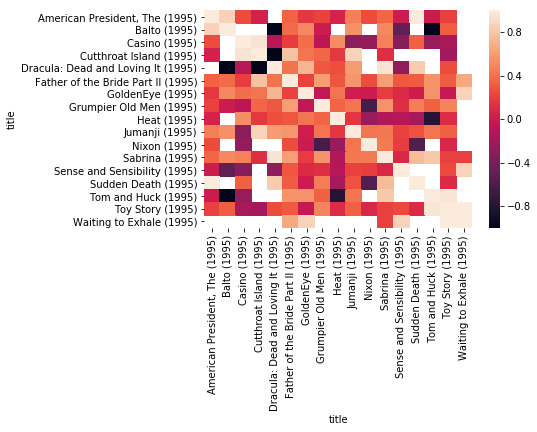

In [11]:
# create a heatmap of this correlation to see similar and dissimilar movies at a glance
import seaborn as sns
sns.heatmap(similarity_with_other_movies, 
            xticklabels=similarity_with_other_movies.columns.values,
            yticklabels=similarity_with_other_movies.columns.values)